In [1]:
from __future__ import division
 
import numpy as np
 
def cmdscale(D):
    """                                                                                       
    Classical multidimensional scaling (MDS)                                                  
                                                                                               
    Parameters                                                                                
    ----------                                                                                
    D : (n, n) array                                                                          
        Symmetric distance matrix.                                                            
                                                                                               
    Returns                                                                                   
    -------                                                                                   
    Y : (n, p) array                                                                          
        Configuration matrix. Each column represents a dimension. Only the                    
        p dimensions corresponding to positive eigenvalues of B are returned.                 
        Note that each dimension is only determined up to an overall sign,                    
        corresponding to a reflection.                                                        
                                                                                               
    e : (n,) array                                                                            
        Eigenvalues of B.                                                                     
                                                                                               
    """
    # Number of points                                                                        
    n = len(D)
 
    # Centering matrix                                                                        
    H = np.eye(n) - np.ones((n, n))/n
 
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
 
    # Diagonalize                                                                             
    evals, evecs = np.linalg.eigh(B)
 
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Compute the coordinates using positive-eigenvalued components only                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)
 
    return Y, evals

In [2]:
import numpy as np

In [3]:
A = np.array([
    [3, 4, 4, 6, 1],
    [5, 1, 1, 7, 3],
    [6, 2, 0, 2, 6],
    [1, 1, 1, 0, 3],
    [4, 7, 3, 6, 2],
    [2, 2, 5, 1, 0],
    [0, 4, 1, 1, 1],
    [0, 6, 4, 3, 5],
    [7, 6, 5, 1, 4],
    [2, 1, 4, 3, 1]])
A

array([[3, 4, 4, 6, 1],
       [5, 1, 1, 7, 3],
       [6, 2, 0, 2, 6],
       [1, 1, 1, 0, 3],
       [4, 7, 3, 6, 2],
       [2, 2, 5, 1, 0],
       [0, 4, 1, 1, 1],
       [0, 6, 4, 3, 5],
       [7, 6, 5, 1, 4],
       [2, 1, 4, 3, 1]])

In [5]:
from scipy.spatial import distance_matrix
D = distance_matrix(A, A)
D

array([[0.        , 5.19615242, 8.36660027, 7.87400787, 3.46410162,
        5.65685425, 6.55743852, 6.164414  , 7.41619849, 4.35889894],
       [5.19615242, 0.        , 6.08276253, 8.06225775, 6.55743852,
        8.42614977, 8.60232527, 8.88819442, 9.05538514, 6.164414  ],
       [8.36660027, 6.08276253, 0.        , 6.32455532, 8.36660027,
        8.83176087, 8.18535277, 8.36660027, 6.8556546 , 7.68114575],
       [7.87400787, 8.06225775, 6.32455532, 0.        , 9.2736185 ,
        5.29150262, 3.87298335, 6.92820323, 8.88819442, 4.79583152],
       [3.46410162, 6.55743852, 8.36660027, 9.2736185 , 0.        ,
        7.87400787, 7.41619849, 6.        , 6.55743852, 7.14142843],
       [5.65685425, 8.42614977, 8.83176087, 5.29150262, 7.87400787,
        0.        , 5.        , 7.07106781, 7.54983444, 2.64575131],
       [6.55743852, 8.60232527, 8.18535277, 3.87298335, 7.41619849,
        5.        , 0.        , 5.74456265, 8.83176087, 5.09901951],
       [6.164414  , 8.88819442, 8.3666002

In [6]:
np.round(D, 2)

array([[0.  , 5.2 , 8.37, 7.87, 3.46, 5.66, 6.56, 6.16, 7.42, 4.36],
       [5.2 , 0.  , 6.08, 8.06, 6.56, 8.43, 8.6 , 8.89, 9.06, 6.16],
       [8.37, 6.08, 0.  , 6.32, 8.37, 8.83, 8.19, 8.37, 6.86, 7.68],
       [7.87, 8.06, 6.32, 0.  , 9.27, 5.29, 3.87, 6.93, 8.89, 4.8 ],
       [3.46, 6.56, 8.37, 9.27, 0.  , 7.87, 7.42, 6.  , 6.56, 7.14],
       [5.66, 8.43, 8.83, 5.29, 7.87, 0.  , 5.  , 7.07, 7.55, 2.65],
       [6.56, 8.6 , 8.19, 3.87, 7.42, 5.  , 0.  , 5.74, 8.83, 5.1 ],
       [6.16, 8.89, 8.37, 6.93, 6.  , 7.07, 5.74, 0.  , 7.42, 6.71],
       [7.42, 9.06, 6.86, 8.89, 6.56, 7.55, 8.83, 7.42, 0.  , 8.  ],
       [4.36, 6.16, 7.68, 4.8 , 7.14, 2.65, 5.1 , 6.71, 8.  , 0.  ]])

In [7]:
res = cmdscale(D)
res

(array([[-1.60383248e+00,  2.38060903e+00,  2.23010920e+00,
         -3.65685587e-01,  1.15364762e-01,  9.25598690e-08,
          1.66891290e-08,  9.55906964e-09],
        [-2.82463766e+00, -2.30937202e+00,  3.95237825e+00,
          3.41918457e-01,  3.31694049e-01, -6.49184522e-08,
          6.61379509e-09,  1.29296467e-08],
        [-1.69082720e+00, -5.13970089e+00, -1.28803060e+00,
          6.50322742e-01, -5.13389655e-02,  3.95253949e-08,
          4.92760269e-08,  4.34080773e-09],
        [ 3.95277192e+00, -2.43233961e+00, -3.83374630e-01,
          6.86399477e-01, -3.46093286e-02,  1.88054816e-10,
         -2.88571420e-10, -4.78931204e-09],
        [-3.59848941e+00,  2.75538195e+00,  2.55139346e-01,
          1.07837408e+00, -1.26125237e+00, -2.84725890e-08,
          3.08362988e-08, -6.78688059e-09],
        [ 2.95203563e+00,  1.35475175e+00,  1.89902742e-01,
         -2.82112202e+00,  1.23858133e-01, -3.02049485e-08,
          6.12199058e-08, -7.17072638e-09],
        [ 3.4689

In [8]:
#points
np.round(res[0], 2)

array([[-1.6 ,  2.38,  2.23, -0.37,  0.12,  0.  ,  0.  ,  0.  ],
       [-2.82, -2.31,  3.95,  0.34,  0.33, -0.  ,  0.  ,  0.  ],
       [-1.69, -5.14, -1.29,  0.65, -0.05,  0.  ,  0.  ,  0.  ],
       [ 3.95, -2.43, -0.38,  0.69, -0.03,  0.  , -0.  , -0.  ],
       [-3.6 ,  2.76,  0.26,  1.08, -1.26, -0.  ,  0.  , -0.  ],
       [ 2.95,  1.35,  0.19, -2.82,  0.12, -0.  ,  0.  , -0.  ],
       [ 3.47,  0.76, -0.3 ,  1.64, -1.94, -0.  ,  0.  ,  0.  ],
       [ 0.35,  2.31, -2.22,  2.92,  2.  , -0.  ,  0.  ,  0.  ],
       [-2.94, -0.01, -4.31, -2.51, -0.19, -0.  , -0.  ,  0.  ],
       [ 1.93,  0.33,  1.87, -1.62,  0.9 ,  0.  , -0.  ,  0.  ]])

In [9]:
#eigenvalues
np.round(res[1], 2)

array([75.19, 58.81, 49.61, 30.43, 10.37,  0.  ,  0.  ,  0.  , -0.  ,
       -0.  ])

In [10]:
A1 = res[0]
A1.shape

(10, 8)

In [11]:
A2 = A1[:, :5]
A2

array([[-1.60383248,  2.38060903,  2.2301092 , -0.36568559,  0.11536476],
       [-2.82463766, -2.30937202,  3.95237825,  0.34191846,  0.33169405],
       [-1.6908272 , -5.13970089, -1.2880306 ,  0.65032274, -0.05133897],
       [ 3.95277192, -2.43233961, -0.38337463,  0.68639948, -0.03460933],
       [-3.59848941,  2.75538195,  0.25513935,  1.07837408, -1.26125237],
       [ 2.95203563,  1.35475175,  0.18990274, -2.82112202,  0.12385813],
       [ 3.46899277,  0.76411068, -0.30165311,  1.63691661, -1.94209512],
       [ 0.35452351,  2.31408566, -2.21617716,  2.92401163,  2.00450379],
       [-2.93623233, -0.01279597, -4.31173854, -2.51227428, -0.18911558],
       [ 1.92569524,  0.32526941,  1.87344449, -1.61886112,  0.90299062]])

In [17]:
z = np.zeros((10, 5))
z
A3 = np.column_stack((A2,z))
A3.shape
np.round(A3, 1)

array([[-1.6,  2.4,  2.2, -0.4,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-2.8, -2.3,  4. ,  0.3,  0.3,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-1.7, -5.1, -1.3,  0.7, -0.1,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 4. , -2.4, -0.4,  0.7, -0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-3.6,  2.8,  0.3,  1.1, -1.3,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 3. ,  1.4,  0.2, -2.8,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 3.5,  0.8, -0.3,  1.6, -1.9,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.4,  2.3, -2.2,  2.9,  2. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-2.9, -0. , -4.3, -2.5, -0.2,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1.9,  0.3,  1.9, -1.6,  0.9,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [13]:
D.shape

(10, 10)

In [14]:
res1 = D - distance_matrix(A3, A3)
np.abs(res1)

array([[0.00000000e+00, 8.88178420e-16, 3.55271368e-15, 2.66453526e-15,
        3.10862447e-15, 8.88178420e-16, 1.77635684e-15, 0.00000000e+00,
        8.88178420e-16, 8.88178420e-16],
       [8.88178420e-16, 0.00000000e+00, 3.55271368e-15, 5.32907052e-15,
        8.88178420e-16, 5.32907052e-15, 3.55271368e-15, 1.77635684e-15,
        3.55271368e-15, 3.55271368e-15],
       [3.55271368e-15, 3.55271368e-15, 0.00000000e+00, 4.44089210e-15,
        3.55271368e-15, 3.55271368e-15, 3.55271368e-15, 3.55271368e-15,
        1.77635684e-15, 3.55271368e-15],
       [2.66453526e-15, 5.32907052e-15, 4.44089210e-15, 0.00000000e+00,
        7.10542736e-15, 8.88178420e-16, 4.44089210e-16, 1.77635684e-15,
        1.77635684e-15, 2.66453526e-15],
       [3.10862447e-15, 8.88178420e-16, 3.55271368e-15, 7.10542736e-15,
        0.00000000e+00, 5.32907052e-15, 3.55271368e-15, 3.55271368e-15,
        1.77635684e-15, 2.66453526e-15],
       [8.88178420e-16, 5.32907052e-15, 3.55271368e-15, 8.88178420e-16,
   

In [18]:
np.round(np.abs(res1), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
np.max(np.abs(res1))

7.105427357601002e-15

#### Conclusion
This confirms that all the differences are essentially zero and that therefore the
observed distance matrix is recovered by the five-dimensional classical scaling
solution.

*Is that true?*

**How to be sure?**

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=5)

In [22]:
pca.fit(A)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
PCA_A2 = pca.transform(A)

In [24]:
PCA_A2

array([[-1.60383248, -2.38060903, -2.2301092 , -0.36568559,  0.11536476],
       [-2.82463766,  2.30937202, -3.95237825,  0.34191846,  0.33169405],
       [-1.6908272 ,  5.13970089,  1.2880306 ,  0.65032274, -0.05133897],
       [ 3.95277192,  2.43233961,  0.38337463,  0.68639948, -0.03460933],
       [-3.59848941, -2.75538195, -0.25513935,  1.07837408, -1.26125237],
       [ 2.95203563, -1.35475175, -0.18990274, -2.82112202,  0.12385813],
       [ 3.46899277, -0.76411068,  0.30165311,  1.63691661, -1.94209512],
       [ 0.35452351, -2.31408566,  2.21617716,  2.92401163,  2.00450379],
       [-2.93623233,  0.01279597,  4.31173854, -2.51227428, -0.18911558],
       [ 1.92569524, -0.32526941, -1.87344449, -1.61886112,  0.90299062]])

In [25]:
A2

array([[-1.60383248,  2.38060903,  2.2301092 , -0.36568559,  0.11536476],
       [-2.82463766, -2.30937202,  3.95237825,  0.34191846,  0.33169405],
       [-1.6908272 , -5.13970089, -1.2880306 ,  0.65032274, -0.05133897],
       [ 3.95277192, -2.43233961, -0.38337463,  0.68639948, -0.03460933],
       [-3.59848941,  2.75538195,  0.25513935,  1.07837408, -1.26125237],
       [ 2.95203563,  1.35475175,  0.18990274, -2.82112202,  0.12385813],
       [ 3.46899277,  0.76411068, -0.30165311,  1.63691661, -1.94209512],
       [ 0.35452351,  2.31408566, -2.21617716,  2.92401163,  2.00450379],
       [-2.93623233, -0.01279597, -4.31173854, -2.51227428, -0.18911558],
       [ 1.92569524,  0.32526941,  1.87344449, -1.61886112,  0.90299062]])

In [26]:
np.max(np.abs(A2) - np.abs(PCA_A2))

6.772360450213455e-15

{<matplotlib.collections.PathCollection at 0x7f7d6ac2c588>,
 <matplotlib.collections.PathCollection at 0x7f7d6ac2c860>}

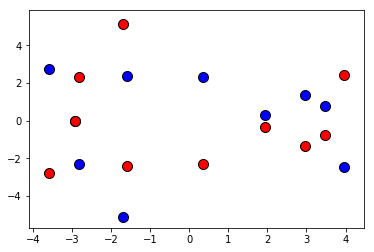

In [28]:
import matplotlib.pyplot as plt
{plt.scatter(A2[:,0],A2[:,1], c='blue',s=100, edgecolor='k'), plt.scatter(PCA_A2[:,0],PCA_A2[:,1], c='red',s=100, edgecolor='k')}